<a href="https://colab.research.google.com/github/andrevcmelo/BootcampAlura2021/blob/main/BootcampAlura_ProjetoModulo03_Andr%C3%A9Melo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto do Módulo 03 do Bootcamp Alura em Data Science Aplicada 2020**

**Aluno: [André Victor Costa de Melo](https://https://www.linkedin.com/in/andrevcmelo/)**

O objetivo deste projeto é realizar uma análise exploratória na base de dados da pesquisa PeNSE de 2015, do IBGE, utilizando conhecimentos de estatística e visualização de dados.

1. Informações sobre a PeNSE 2015 - https://www.ibge.gov.br/estatisticas/sociais/populacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=o-que-e

2. IBGE Explica - PeNSE: https://www.youtube.com/watch?v=z4BBCHZUvD4

3. Microdados Download: https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html?caminho=pense/2015/microdados/

4. Link Dicionário dos Dados: https://github.com/andrevcmelo/BootcampAlura2021/blob/main/bases_modulo3/Dicionario_PENSE_Microdados_AMOSTRA2.xls

5. Link Base de Dados: https://raw.githubusercontent.com/andrevcmelo/BootcampAlura2021/main/bases_modulo3/PENSE_AMOSTRA2_ALUNOESCOLA.CSV

# **Resumo**

A Pesquisa Nacional de Saúde do Escolar - PeNSE teve início em 2009, fruto de parceria com o Ministério da Saúde e apoio do Ministério da Educação. Na edição de 2015, que utilizaremos como base de dados para este projeto, se destaca a disponibilização de informações oriundas de dois planos amostrais distintos: 1) escolares frequentando o 9o ano do ensino fundamental e **2)** escolares de 13 a 17 anos de idade frequentando as etapas do 6o ao 9o ano do ensino fundamental (antigas 5a a 8a séries) e da 1a a 3a série do ensino médio. Neste projeto iremos utilizar a **amostra 2**.

A pesquisa fornece informações sobre as características básicas da população de estudo, divididas entre:
1. `Dados dos alunos:` incluindo aspectos socioeconômicos, como escolaridade dos pais, inserção no mercado de trabalho e posse de bens e serviços; contextos social e familiar; fatores de risco comportamentais relacionados a hábitos alimentares, sedentarismo, tabagismo, consumo de álcool e outras drogas; saúde sexual e reprodutiva; exposição a acidentes e violências; hábitos de higiene; saúde bucal; saúde mental; e percepção da imagem corporal, entre outros tópicos. 
2. `Dados das escolas:` Características do ambiente escolar e do entorno são também contempladas, incluindo informações relacionadas à infraestrutura disponível para alimentação e atividade física; acessibilidade; saneamento básico; existência de regras e normas de conduta adotadas pelas escolas; políticas de assistência à saúde; e nível de segurança do entorno, entre outros aspectos.

Diante deste cenário da base de dados, irei avaliar algumas hipóteses através de análises exploratórias nos dados. As hipóteses que guiarão este projeto são:

1. Os adolescentes brasileiros estão satisfeitos com seus corpos?
2. Há uma alta frequência de bullying nas escolas?
3. A aparência do corpo é o principal motivo de bullying?
4. O racismo é frequente em relação aos principais motivos de bullying?
5. Os alunos de escola pública costumam gastar mais tempo de deslocamento no dia a dia?
6. Uma pesquisa recente noticiada na revista [Galileu](https://revistagalileu.globo.com/Ciencia/Saude/noticia/2020/12/jovens-brasileiros-estao-mais-altos-mas-nao-necessariamente-mais-saudaveis.html) aponta que as meninas de 19 anos têm em média 23,30 de IMC. A amostra utilizada condiz com a pesquisa (mesmo contendo dados de 2015)?

# **Análise dos Dados**

## Importação de Bibliotecas

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.stats.weightstats import ztest
import scipy.stats as sct

## Importação de Dados

In [49]:
#base de dados da Amostra 2
url = 'https://raw.githubusercontent.com/andrevcmelo/BootcampAlura2021/main/bases_modulo3/PENSE_AMOSTRA2_ALUNOESCOLA.CSV'

df = pd.read_csv(url, sep=';',thousands=".", decimal=",")

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 296 entries, ANOPESQ to turma
dtypes: float64(10), int64(286)
memory usage: 37.4 MB


In [51]:
df.head(5)

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VE01P14A04,VE01P14A05,VE01P14A06,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,5,1,296


## Tratamento dos dados

Como podemos ver, as colunas da base de dados estão em códigos, para facilitar a visualização e manipulação dos dados. Diante disto, usaremos o dicionário de dados fornecido pelo IBGE para renomear as colunas e alguns categóricos que iremos utilizar nas análises.

In [52]:
#Dicionários para auxiliar nas análises
regiao = {
    1: 'Norte',
    2: 'Nordeste',
    3: 'Sudeste',
    4: 'Sul',
    5: 'Centro-Oeste'
}
sexo = {
    1: 'Masculino',
    2: 'Feminino'
}
raca = {
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    99: 'Não informado'
}
turno = {
    1: 'Manhã',
    2: 'Intermediário',
    3: 'Tarde',
    4: 'Noite',
    5: 'Integral',
    99: 'Não informado'
}
serie = {
    1: '6º ano Ensino Fundamental',
    2: '7º ano Ensino Fundamental',
    3: '8º ano Ensino Fundamental',
    4: '9º ano Ensino Fundamental',
    5: '1º ano Ensino Médio',
    6: '2º ano Ensino Médio',
    7: '3º ano Ensino Médio',
    99: 'Não informado'
}
situacao_escola = {
    1: 'Urbana',
    2: 'Rural'
}
tipo_escola = {
    1: 'Pública',
    2: 'Privada'
}
satisfacao = {
    1: 'Muito satisfeito(a)',
    2: 'Satisfeito(a)',
    3: 'Indiferente',
    4: 'Insatisfeito(a)',
    5: 'Muito insatisfeito(a)',
    99: 'Não informado'
}
frequencia = {
    1: 'Nunca',
    2: 'Raramente',
    3: 'Às vezes',
    4: 'Na maior parte do tempo',
    5: 'Sempre',
    99: 'Não informado'
}
motivo_bullying = {
    -1: 'Pulo no questionário',
    1: 'A minha cor ou raça',
    2: 'A minha religião',
    3: 'A aparência do meu rosto',
    4: 'A aparência do meu corpo',
    5: 'A minha orientação sexual',
    6: 'A minha região de origem',
    7: 'Outros motivos/causas',
    99: 'Não informado'
}
sofreu_bullying = {
    1: 'Sim',
    2: 'Não',
    3: 'Não sei o que é bullying',
    99: 'Não informado'
}

In [53]:
#Criando colunas "traduzidas" de acordo com o Dicionário de dados e inserindo em um novo DataFrame para facilitar as análises
dados = pd.DataFrame()
dados['Regiao'] = df['REGEOGR'].map(regiao)
dados['Sexo'] = df['VB01001'].map(sexo)
dados['Raça'] = df['VB01002'].map(raca)
dados['Idade'] = df['VB01003']
dados['Serie'] = df['VB01021'].map(serie)
dados['Turno'] = df['VB01022'].map(turno)
dados['DeslocDiario'] = df['TEMPODESLOC']
dados['SituacaoEscola'] = df['V0006'].map(situacao_escola)
dados['TipoEscola'] = df['V0007'].map(tipo_escola)
dados['Altura'] = round(df['VB17004']/100,2)
dados['Peso'] = round(df['VB17003'],2)
dados['Satisfacao_Corpo'] = df['VB11007'].map(satisfacao)
dados['Ja_Sofreu_Bullying'] = df['VB07010'].map(sofreu_bullying)
dados['Frequencia_Bullying'] = df['VB07007'].map(frequencia)
dados['Motivo_Bullying'] = df['VB07008'].map(motivo_bullying)

dados.head(5)

,Regiao,Sexo,Raça,Idade,Serie,Turno,DeslocDiario,SituacaoEscola,TipoEscola,Altura,Peso,Satisfacao_Corpo,Ja_Sofreu_Bullying,Frequencia_Bullying,Motivo_Bullying
0,Norte,Feminino,Branca,13,9º ano Ensino Fundamental,Manhã,0.0,Urbana,Privada,1.57,37.1,Satisfeito(a),Não,Nunca,Pulo no questionário
1,Norte,Feminino,Branca,14,9º ano Ensino Fundamental,Manhã,120.0,Urbana,Privada,1.52,50.2,Satisfeito(a),Não,Nunca,Pulo no questionário
2,Norte,Masculino,Parda,13,9º ano Ensino Fundamental,Manhã,0.0,Urbana,Privada,1.61,48.2,Satisfeito(a),Sim,Raramente,Outros motivos/causas
3,Norte,Masculino,Branca,14,9º ano Ensino Fundamental,Manhã,0.0,Urbana,Privada,1.72,69.4,Satisfeito(a),Sim,Nunca,Pulo no questionário
4,Norte,Masculino,Branca,13,9º ano Ensino Fundamental,Manhã,30.0,Urbana,Privada,1.68,78.9,Insatisfeito(a),Sim,Raramente,A aparência do meu corpo


Criando uma features para maximizar as possibilidades de análise, que são:
1. IMC (Índice de Massa Corporal)
2. Definição de Classes de IMC
3. Classes de Altura
4. Classes de Peso

**Extra**: [Regra de Sturges](https://maestrovirtuale.com/regra-de-sturges-explicacao-aplicacoes-e-exemplos/#:~:text=A%20regra%20Sturges%20%C3%A9%20um%20m%C3%A9todo%20emp%C3%ADrico%20amplamente%20usado%20em,representando%20uma%20amostra%20ou%20popula%C3%A7%C3%A3o.) é um critério usado para determinar o número de classes ou intervalos necessários para representar graficamente um conjunto de dados estatísticos.

In [54]:
# 1.
dados['IMC'] = round(dados['Peso'] / dados['Altura']**2,2)

#2.
classes_IMC = [0, 18, 25, 30, 60]
rotulos_IMC = ['Desnutrido', 'Normal', 'Sobrepeso', 'Obesidade']
dados['Classe_IMC'] = pd.cut(x = dados['IMC'], bins = classes_IMC, labels = rotulos_IMC, include_lowest=True)

#K = número de intervalos de categoria para auxiliar em análises, utilizando a Regra de Sturges
k = int(1 + ((10/3) * np.log10(len(dados))))

#3.
dados['Classe_Altura'] = pd.cut(x = dados['Altura'], bins = k, include_lowest=True)

#4.
dados['Classe_Peso'] = pd.cut(x = dados['Peso'], bins = k, include_lowest=True)

dados.head(5)

,Regiao,Sexo,Raça,Idade,Serie,Turno,DeslocDiario,SituacaoEscola,TipoEscola,Altura,Peso,Satisfacao_Corpo,Ja_Sofreu_Bullying,Frequencia_Bullying,Motivo_Bullying,IMC,Classe_IMC,Classe_Altura,Classe_Peso
0,Norte,Feminino,Branca,13,9º ano Ensino Fundamental,Manhã,0.0,Urbana,Privada,1.57,37.1,Satisfeito(a),Não,Nunca,Pulo no questionário,15.05,Desnutrido,"(1.524, 1.571]","(34.94, 46.32]"
1,Norte,Feminino,Branca,14,9º ano Ensino Fundamental,Manhã,120.0,Urbana,Privada,1.52,50.2,Satisfeito(a),Não,Nunca,Pulo no questionário,21.73,Normal,"(1.477, 1.524]","(46.32, 57.7]"
2,Norte,Masculino,Parda,13,9º ano Ensino Fundamental,Manhã,0.0,Urbana,Privada,1.61,48.2,Satisfeito(a),Sim,Raramente,Outros motivos/causas,18.59,Normal,"(1.571, 1.619]","(46.32, 57.7]"
3,Norte,Masculino,Branca,14,9º ano Ensino Fundamental,Manhã,0.0,Urbana,Privada,1.72,69.4,Satisfeito(a),Sim,Nunca,Pulo no questionário,23.46,Normal,"(1.713, 1.761]","(69.08, 80.46]"
4,Norte,Masculino,Branca,13,9º ano Ensino Fundamental,Manhã,30.0,Urbana,Privada,1.68,78.9,Insatisfeito(a),Sim,Raramente,A aparência do meu corpo,27.95,Sobrepeso,"(1.666, 1.713]","(69.08, 80.46]"


## Resumo Geral da Base de Dados

Esta sessão tem como função mostarmos antecipadamente um quadro geral de algumas informações sobre a base de dados, contendo distribuições entre alguns parâmetros chave e suas respectivas porcentagens.

Para isto, criei a função abaixo que recebe como parâmetros 1) a base de dados e 2) a coluna a ser analisada.

**Lembrando que todos os dados da amostra foram fornecidos diretamente pelos estudantes e que os alunos possuem entre 11 e 19 anos.**

In [55]:
def tabela_frequencia_categoria(data, col):
  frequencia = round(data[col].value_counts(normalize = True) * 100,2)
  distribuicao = data[col].value_counts()
  tabela = pd.DataFrame({'Distribuicao': distribuicao, 'Frequencia (%)': frequencia})
  tabela.rename_axis('Atributos', axis = 1, inplace = True)
  return tabela.style.format("{:,.2f}").background_gradient(axis = 0, cmap = 'Reds')

Podemos ver abaixo que na base de dados o quantitativo de alunos de escola pública é cerca de 3x maior que de escola Privada. Isto pode trazer uma certa tendência errônea em análises comparativas entre os tipos de escola, pois há um evidente desbalanceamento entre as classes.

In [69]:
#Distribuição entre escolas Públicas e Privadas da amostra da base de dados
tabela_frequencia_categoria(dados,'TipoEscola')

Atributos,Distribuicao,Frequencia (%)
Pública,"12,381.00",74.78
Privada,"4,175.00",25.22


Vemos abaixo uma predominância Parda e Branca na amostra, com aproximadamente 80% do total.

In [56]:
#Distribuição entre as raças dos estudantes da amostra da base de dados
tabela_frequencia_categoria(dados,'Raça')

Atributos,Distribuicao,Frequencia (%)
Parda,"6,726.00",40.63
Branca,"6,575.00",39.71
Preta,"1,939.00",11.71
Amarela,712.00,4.30
Indígena,581.00,3.51
Não informado,23.00,0.14


Vemos abaixo uma distribuição bastante balanceada entre meninas e meninos na amostra.

In [57]:
#Distribuição entre os sexos dos estudantes da amostra da base de dados
tabela_frequencia_categoria(dados,'Sexo')

Atributos,Distribuicao,Frequencia (%)
Masculino,"8,287.00",50.05
Feminino,"8,269.00",49.95


Vemos abaixo um certo balanceamento entre os números de estudantes por série das escolas pesquisadas.

In [58]:
#Distribuição entre as séries dos estudantes da amostra da base de dados
tabela_frequencia_categoria(dados,'Serie')

Atributos,Distribuicao,Frequencia (%)
7º ano Ensino Fundamental,"3,042.00",18.37
8º ano Ensino Fundamental,"2,604.00",15.73
6º ano Ensino Fundamental,"2,583.00",15.60
2º ano Ensino Médio,"2,438.00",14.73
1º ano Ensino Médio,"2,383.00",14.39
9º ano Ensino Fundamental,"1,761.00",10.64
3º ano Ensino Médio,"1,736.00",10.49
Não informado,9.00,0.05


Vemos abaixo as distribuições das alturas dos estudantes da base de dados. Juntando meninos e meninas, vemos que a maioria está entre 1.52 metros e 1.66 metros.
Quando separamos entre meninos e meninas, observamos que as meninas variam a altura entre 1.51 metros e 1.68 metros. Entretanto, para os meninos, observamos que o intervalo de altura predominante é entre 1.59 metros e 1.74 metros.

In [59]:
#Distribuição entre classes de Altura dos estudantes da amostra da base de dados
tabela_frequencia_categoria(dados,'Classe_Altura')

Atributos,Distribuicao,Frequencia (%)
"(1.619, 1.666]","2,881.00",17.40
"(1.524, 1.571]","2,776.00",16.77
"(1.571, 1.619]","2,638.00",15.93
"(1.666, 1.713]","2,098.00",12.67
"(1.477, 1.524]","1,905.00",11.51
"(1.713, 1.761]","1,531.00",9.25
"(1.429, 1.477]",950.00,5.74
"(1.761, 1.808]",655.00,3.96
"(1.382, 1.429]",406.00,2.45
"(1.808, 1.855]",334.00,2.02


Dividindo a base de dados entre meninos e meninas e recalculando seus intervalos de classes.

In [60]:
dados_meninas = dados.loc[(dados["Sexo"]=="Feminino")]
dados_meninos = dados.loc[(dados["Sexo"]=="Masculino")]

#K = número de intervalos de categoria para auxiliar em análises, utilizando a Regra de Sturges
kmeninas = int(1 + ((10/3) * np.log10(len(dados_meninas))))

kmeninos = int(1 + ((10/3) * np.log10(len(dados_meninos))))

#3.
dados_meninas['Classe_Altura'] = pd.cut(x = dados_meninas['Altura'], bins = kmeninas, include_lowest=True)
dados_meninos['Classe_Altura'] = pd.cut(x = dados_meninos['Altura'], bins = kmeninos, include_lowest=True)
#4.
dados_meninas['Classe_Peso'] = pd.cut(x = dados_meninas['Peso'], bins = kmeninas, include_lowest=True)
dados_meninos['Classe_Peso'] = pd.cut(x = dados_meninos['Peso'], bins = kmeninos, include_lowest=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [61]:
#Distribuição entre classes de Altura das meninas da amostra da base de dados
tabela_frequencia_categoria(dados_meninas,'Classe_Altura')

Atributos,Distribuicao,Frequencia (%)
"(1.555, 1.597]","1,885.00",22.80
"(1.597, 1.639]","1,671.00",20.21
"(1.513, 1.555]","1,428.00",17.27
"(1.639, 1.681]","1,271.00",15.37
"(1.471, 1.513]",831.00,10.05
"(1.429, 1.471]",437.00,5.28
"(1.681, 1.724]",363.00,4.39
"(1.386, 1.429]",167.00,2.02
"(1.724, 1.766]",80.00,0.97
"(1.344, 1.386]",73.00,0.88


In [62]:
#Distribuição entre classes de Altura dos meninos da amostra da base de dados
tabela_frequencia_categoria(dados_meninos,'Classe_Altura')

Atributos,Distribuicao,Frequencia (%)
"(1.696, 1.747]","1,584.00",19.11
"(1.646, 1.696]","1,297.00",15.65
"(1.595, 1.646]","1,136.00",13.71
"(1.747, 1.798]",890.00,10.74
"(1.544, 1.595]",821.00,9.91
"(1.494, 1.544]",752.00,9.07
"(1.443, 1.494]",619.00,7.47
"(1.798, 1.849]",462.00,5.57
"(1.392, 1.443]",376.00,4.54
"(1.341, 1.392]",153.00,1.85


Para avaliar um pouco mais sobre as alturas de meninos e meninas, vemos no gráfico abaixo a distribuição das alturas por idade e por sexo. Deste modo, podemos ver que as meninas "param de crescer" aos 13 anos, mantendo uma certa estabilidade de altura a partir daí. Já os meninos seguem crescendo, no geral, até os 16 anos e mantém uma certa estabilidade de altura a partir daí.

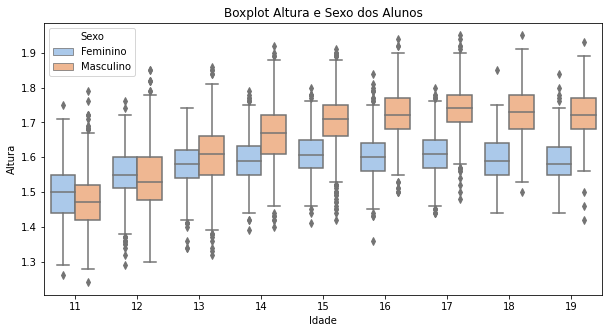

In [63]:
ax = sns.boxplot(data = dados, x = 'Idade', y = 'Altura', hue = 'Sexo', palette='pastel')
ax.set_title('Boxplot Altura e Sexo dos Alunos')
ax.figure.set_size_inches(10, 5)

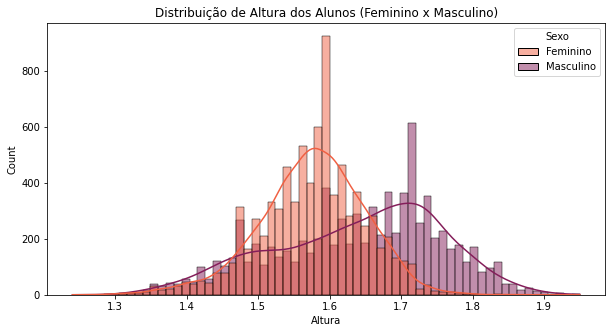

In [89]:
ax = sns.histplot(data = dados, x = 'Altura', kde=True, hue = 'Sexo', palette='rocket_r')
ax.set_title('Distribuição de Altura dos Alunos (Feminino x Masculino)')
ax.figure.set_size_inches(10, 5)

Vemos abaixo as distribuições dos pesos dos estudantes da base de dados. Juntando meninos e meninas, vemos que a maioria está entre aproximadamente 35 KG e 69 KG.
Quando separamos entre meninos e meninas, observamos que as meninas pesam em média entre 40 KG e 60 KG. Entretanto, para os meninos, observamos que o intervalo de altura predominante é entre 37 KG e 74 KG.

In [64]:
#Distribuição entre classes de Peso dos estudantes da amostra da base de dados
tabela_frequencia_categoria(dados,'Classe_Peso')

Atributos,Distribuicao,Frequencia (%)
"(46.32, 57.7]","5,754.00",34.75
"(34.94, 46.32]","3,852.00",23.27
"(57.7, 69.08]","3,724.00",22.49
"(69.08, 80.46]","1,425.00",8.61
"(23.56, 34.94]",927.00,5.60
"(80.46, 91.84]",544.00,3.29
"(91.84, 103.22]",202.00,1.22
"(103.22, 114.6]",77.00,0.47
"(114.6, 125.98]",20.00,0.12
"(125.98, 137.36]",15.00,0.09


In [65]:
#Distribuição entre classes de Peso das meninas da amostra da base de dados
tabela_frequencia_categoria(dados_meninas,'Classe_Peso')

Atributos,Distribuicao,Frequencia (%)
"(40.514, 50.321]","2,763.00",33.41
"(50.321, 60.129]","2,565.00",31.02
"(60.129, 69.936]","1,095.00",13.24
"(30.707, 40.514]",993.00,12.01
"(69.936, 79.743]",435.00,5.26
"(79.743, 89.55]",173.00,2.09
"(20.762, 30.707]",139.00,1.68
"(89.55, 99.357]",64.00,0.77
"(99.357, 109.164]",31.00,0.37
"(109.164, 118.971]",6.00,0.07


In [68]:
#Distribuição entre classes de Peso das meninos da amostra da base de dados
tabela_frequencia_categoria(dados_meninos,'Classe_Peso')

Atributos,Distribuicao,Frequencia (%)
"(49.571, 61.764]","2,783.00",33.58
"(37.379, 49.571]","1,981.00",23.90
"(61.764, 73.957]","1,679.00",20.26
"(25.186, 37.379]",810.00,9.77
"(73.957, 86.15]",642.00,7.75
"(86.15, 98.343]",237.00,2.86
"(98.343, 110.536]",91.00,1.10
"(110.536, 122.729]",30.00,0.36
"(122.729, 134.921]",14.00,0.17
"(134.921, 147.114]",8.00,0.10


Vemos abaixo que a maioria dos estudantes estão na normalidade do peso, cerca de 25% considerados desnutridos e cerca de 4% considerados obesos.

In [67]:
#Distribuição entre classes de IMC dos estudantes da amostra da base de dados
tabela_frequencia_categoria(dados,'Classe_IMC')

Atributos,Distribuicao,Frequencia (%)
Normal,"10,101.00",61.01
Desnutrido,"4,069.00",24.58
Sobrepeso,"1,751.00",10.58
Obesidade,635.00,3.84


## Análises

###### **1) Os adolescentes brasileiros estão satisfeitos com seus corpos?**

In [70]:
#Satisfação com o próprio corpo (meninos x meninas) - Quantidade
Satiscacao_Corpo = pd.crosstab(dados['Satisfacao_Corpo'], dados['Sexo'])
Satiscacao_Corpo.style.background_gradient(axis = 0, cmap = 'Reds')

Sexo,Feminino,Masculino
Satisfacao_Corpo,,
Indiferente,857,950
Insatisfeito(a),1540,786
Muito insatisfeito(a),454,260
Muito satisfeito(a),1926,2682
Não informado,62,119
Satisfeito(a),3430,3490


In [71]:
#Satisfação com o próprio corpo (meninos x meninas) - Porcentagem Geral
Satiscacao_Corpo_porcGeral = pd.crosstab(dados['Satisfacao_Corpo'], dados['Sexo'], normalize = True) * 100
Satiscacao_Corpo_porcGeral.style.format("{:,.2f}").background_gradient(axis = 0, cmap = 'Reds')

Sexo,Feminino,Masculino
Satisfacao_Corpo,,
Indiferente,5.18,5.74
Insatisfeito(a),9.30,4.75
Muito insatisfeito(a),2.74,1.57
Muito satisfeito(a),11.63,16.20
Não informado,0.37,0.72
Satisfeito(a),20.72,21.08


Como podemos notar acima, no geral, por volta de 70% dos entrevistados estão Satisfeitos ou Muito Satisfeitos com seus corpos.

Abaixo podemos ver a divisão do nível de satisfação do corpo entre os sexos. Podemos notar que entre os Insatisfeitos e Muito Insatisfeitos, no geral, as meninas são mais dua vezes mais insatisfeitas com seus corpos em relação aos meninos.

In [72]:
#Satisfação com o próprio corpo (meninos x meninas) - Porcentagem por Gênero
Satiscacao_Corpo_porcGenero = pd.crosstab(dados['Satisfacao_Corpo'], dados['Sexo'], normalize = 'columns') * 100
Satiscacao_Corpo_porcGenero.style.format("{:,.2f}").background_gradient(axis = 0, cmap = 'Reds')

Sexo,Feminino,Masculino
Satisfacao_Corpo,,
Indiferente,10.36,11.46
Insatisfeito(a),18.62,9.48
Muito insatisfeito(a),5.49,3.14
Muito satisfeito(a),23.29,32.36
Não informado,0.75,1.44
Satisfeito(a),41.48,42.11


**Conclusão:** Em 2015, por volta de 70% dos estudantes da amostra estão Satisfeitos com seus corpos. Entretanto, quando tratamos da insatisfação, as meninas são duas vezes mais insatisfeitas em relação ao seu corpo. Esta questão deve gerar uma reflexão sobre as ações de marketing e pressão social aplicada nas meninas para seguirem os 'padrões de beleza' estabelecidos na sociedade e suas implicações no psicológico das pessoas, principalmente nas meninas.

###### **2) Há uma alta frequência de bullying nas escolas?**

In [73]:
#Distribuição das respostas sobre a pergunta "Você já sofreu bullying?"
tabela_frequencia_categoria(dados,'Ja_Sofreu_Bullying')

Atributos,Distribuicao,Frequencia (%)
Não,"8,533.00",51.54
Sim,"7,584.00",45.81
Não sei o que é bullying,387.00,2.34
Não informado,52.00,0.31


In [74]:
#Distribuição das respostas sobre a pergunta "Qual frequência você sofre bullying?"
tabela_frequencia_categoria(dados,'Frequencia_Bullying')

Atributos,Distribuicao,Frequencia (%)
Nunca,"9,147.00",55.25
Raramente,"3,541.00",21.39
Às vezes,"2,550.00",15.40
Na maior parte do tempo,670.00,4.05
Sempre,545.00,3.29
Não informado,103.00,0.62


**Conclusão:** Em 2015, 45% dos entrevistados relataram que já sofreram bullying. Adicionalmente, podemos notar que cerca de 15% sofre bullying as vezes, 4% sofre com frequência e 3% sofre com alta frequência. Isto demonstra a necessidade de atuação de suporte para as menorias. 

Entretanto, apenas 2.34% dos alunos não sabiam o que era bullying, isto demonstra uma alta conscientização sobre o tema.

###### **3) A aparência do corpo é o principal motivo de bullying?**

Já foi apresentado uma avaliação sobre a satisfação com o próprio corpo e sobre a ocorrência de bullying. Nesta avaliação, iremos verificar a correlação entre eles. Será que o bullying sobre aparência do corpo pode interferir com a própria satisfação com o corpo?

In [76]:
#Distribuição dos motivos de bullying 
tabela_frequencia_categoria(dados,'Motivo_Bullying')

Atributos,Distribuicao,Frequencia (%)
Pulo no questionário,"9,250.00",55.87
Outros motivos/causas,"4,489.00",27.11
A aparência do meu corpo,"1,110.00",6.70
A aparência do meu rosto,705.00,4.26
A minha cor ou raça,403.00,2.43
A minha religião,241.00,1.46
A minha orientação sexual,160.00,0.97
A minha região de origem,119.00,0.72
Não informado,79.00,0.48


Podemos conferir uma correlação entre o número de alunos que disseram nunca sofrer bullying (9,147.00) com o número de pessoas que pularam o questionário na sessão de motivo do bullying (9,250.00). Desta forma, menos da metade da amostra será válida para a avaliação da hipótese apresentada.

Ainda mais, 27% da amostra respondeu "Outros motivos/causas". O que nos sobra cerca de 15% da amostra total para tirarmos alguma conclusão.

Entretanto, o 3° maior percentual de respostas para os motivos do bullying foi de "Aparência do meu corpo". Então, conseguimos manter a hipótese minimamente válida para darmos continuidade (simploriamente, sem utilização de testes estatísticos para validar hipótese)


Entre os Insatisfeitos e Muito Insatisfeitos, podemos observar que o índice do IMC está na faixa de Sobrepeso.

In [75]:
#IMC médio das Categorias de Estudantes que por Satisfação com seu corpo
Satiscacao_Corpo_porcGeneroSatisfacao2 = pd.crosstab(index = dados['Satisfacao_Corpo'], \
                                                     columns = dados['Sexo'], aggfunc=np.mean, values = dados['IMC'] ).round(2)
Satiscacao_Corpo_porcGeneroSatisfacao2.style.format("{:,.2f}").background_gradient(axis = 0, cmap = 'Reds')

Sexo,Feminino,Masculino
Satisfacao_Corpo,,
Indiferente,21.95,21.94
Insatisfeito(a),22.66,23.03
Muito insatisfeito(a),23.54,22.48
Muito satisfeito(a),19.86,19.86
Não informado,20.76,20.50
Satisfeito(a),20.55,20.66


Tendo como ponto de referência a Satisfação do Corpo vs a Frequencia de Bullying, vemos que os Muito Insatisfeito possuem o maior índice em Frequência de Bullying "Na maior parte do tempo" e em "Às vezes".

In [77]:
#Será que os estudantes mais insatisfeitos com seus corpos sofrem bullying referente ao seu peso?
Satiscacao_Corpo_Bullying = pd.crosstab(index = dados['Satisfacao_Corpo'], \
                                                     columns = dados['Frequencia_Bullying'], normalize = 'index') * 100 #,aggfunc=np.mean, values = dados['IMC'] ).round(1)
Satiscacao_Corpo_Bullying.round(2).style.format("{:,.2f}").background_gradient(axis = 1, cmap = 'Reds')

Frequencia_Bullying,Na maior parte do tempo,Nunca,Não informado,Raramente,Sempre,Às vezes
Satisfacao_Corpo,,,,,,
Indiferente,5.70,46.93,0.22,25.40,3.15,18.59
Insatisfeito(a),4.77,47.42,0.26,25.97,3.05,18.53
Muito insatisfeito(a),9.10,36.83,0.56,19.05,12.32,22.13
Muito satisfeito(a),3.60,61.11,0.41,15.89,3.91,15.08
Não informado,3.87,38.12,31.49,10.50,4.42,11.60
Satisfeito(a),3.15,58.50,0.19,22.99,2.04,13.14


Corroborando com a relação acima, mostramos abaixo a correlação entre Motivo do Bullying vs Satisfação do Corpo, onde vemos os maiores índices em "Aparencia do meu corpo" e "Insatisfeito e Muito Insatisfeito"

In [78]:
#Será que há relação entre Insatisfação com o Corpo e os principais motivos de bullying?
Satiscacao_Corpo_Bullying = pd.crosstab(index = dados['Satisfacao_Corpo'], \
                                                     columns = dados['Motivo_Bullying'], normalize = True) * 100 #,aggfunc=np.mean, values = dados['IMC'] ).round(1)
Satiscacao_Corpo_Bullying.round(2).style.format("{:,.2f}").background_gradient(axis = 1, cmap = 'Reds')

Motivo_Bullying,A aparência do meu corpo,A aparência do meu rosto,A minha cor ou raça,A minha orientação sexual,A minha região de origem,A minha religião,Não informado,Outros motivos/causas,Pulo no questionário
Satisfacao_Corpo,,,,,,,,,
Indiferente,1.17,0.54,0.24,0.16,0.10,0.17,0.03,3.35,5.15
Insatisfeito(a),1.99,0.67,0.25,0.18,0.08,0.11,0.06,4.00,6.70
Muito insatisfeito(a),0.97,0.22,0.16,0.10,0.04,0.08,0.02,1.11,1.61
Muito satisfeito(a),0.85,1.20,0.95,0.28,0.21,0.54,0.13,6.54,17.12
Não informado,0.02,0.04,0.03,0.01,0.01,0.00,0.04,0.18,0.76
Satisfeito(a),1.71,1.58,0.80,0.23,0.28,0.55,0.19,11.92,24.53


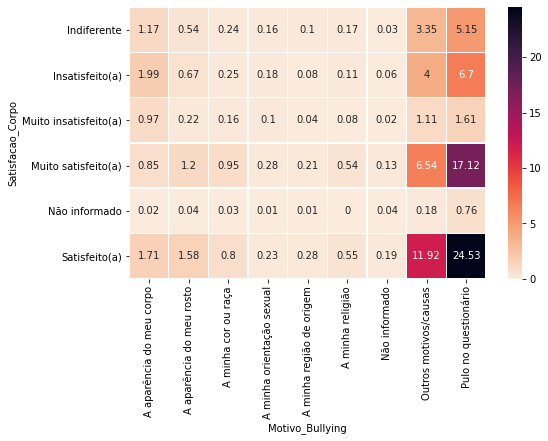

In [80]:
#Outra forma de visualizar a mesma informação
def plot_heatmap(cross_table, fmt='g'):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.heatmap(cross_table,
                annot=True,
                fmt=fmt,
                cmap='rocket_r',
                linewidths=.5,
                ax=ax)
    plt.show();
    
plot_heatmap(Satiscacao_Corpo_Bullying.round(2))

Por final, observando a coluna de Satisfação do Corpo, vemos que as respostas dos alunos Insatisfeitos e Muito Insatisfeitos predominam na "Aparência do meu corpo".

In [82]:
#E em relação aos insatisfeitos, quais serão os principais motivos de bullying?
Satiscacao_Corpo_Bullying_2 = pd.crosstab(index = dados['Satisfacao_Corpo'], \
                                                     columns = dados['Motivo_Bullying'], normalize = 'index') * 100 #,aggfunc=np.mean, values = dados['IMC'] ).round(1)
Satiscacao_Corpo_Bullying_2.round(2).style.format("{:,.2f}").background_gradient(axis = 1, cmap = 'Reds')

Motivo_Bullying,A aparência do meu corpo,A aparência do meu rosto,A minha cor ou raça,A minha orientação sexual,A minha região de origem,A minha religião,Não informado,Outros motivos/causas,Pulo no questionário
Satisfacao_Corpo,,,,,,,,,
Indiferente,10.74,4.98,2.21,1.49,0.89,1.55,0.28,30.71,47.15
Insatisfeito(a),14.14,4.77,1.76,1.29,0.60,0.82,0.43,28.50,47.68
Muito insatisfeito(a),22.41,5.18,3.78,2.24,0.84,1.82,0.56,25.77,37.39
Muito satisfeito(a),3.04,4.32,3.41,1.02,0.76,1.95,0.48,23.50,61.52
Não informado,2.21,3.87,2.76,1.10,0.55,0.00,3.31,16.57,69.61
Satisfeito(a),4.09,3.77,1.92,0.55,0.68,1.32,0.46,28.53,58.68


**Conclusão:** Apesarda maioria dos alunos responderem que não sofrem bullying, quando utilizamos os dados dos alunos que sofrem bullying, percebemos que o maior índice de bullying é em relação ao corpo do adolescente. Como indicativo adicional, vimos que o IMC, em geral, é equivalente ao sobrepeso. Podemos concluir que há um forte indício que poderíamos analisar mais a fundo utilizando novas bases de dados e avaliarmos com mais profundidade a relação entre o sobrepeso dos adolescentes e o bullying imposto pela sociedade para estas pessoas, que poderia resultar em ações de conscientização contra este tipo de abuso.

###### **4) O racismo é frequente em relação aos principais motivos de bullying?**

Podemos relacionar o aumento de casos de racismo em 2020 com a prática de bullying racial já nas escolas?

In [83]:
#E o racismo, será que está entre os principais motivos de bullying?
Satiscacao_Corpo_Bullying_3 = pd.crosstab(index = dados['Raça'], \
                                                     columns = dados['Motivo_Bullying'],  normalize = 'index') * 100
Satiscacao_Corpo_Bullying_3.round(2).style.format("{:,.2f}").background_gradient(axis = 1, cmap = 'Reds')

Motivo_Bullying,A aparência do meu corpo,A aparência do meu rosto,A minha cor ou raça,A minha orientação sexual,A minha região de origem,A minha religião,Não informado,Outros motivos/causas,Pulo no questionário
Raça,,,,,,,,,
Amarela,8.15,3.93,1.97,0.70,1.12,2.11,0.42,25.28,56.32
Branca,7.30,4.02,1.00,0.96,0.76,1.25,0.52,29.13,55.07
Indígena,6.37,4.13,3.10,0.86,1.03,1.72,0.69,26.33,55.77
Não informado,0.00,0.00,13.04,0.00,0.00,0.00,4.35,21.74,60.87
Parda,6.74,4.59,1.92,0.97,0.64,1.47,0.42,27.28,55.98
Preta,4.23,4.13,8.92,1.13,0.62,1.81,0.46,20.68,58.02


**Conclusão:** Como vemos, a raça com maior representatividade de casos de bullying na categoria "A minha cor ou raça" é na raça Negra. Olhando os dados de 2015 e os casos de racismo recentes, podemos ver que o racismo é um problema sério a ser combatido já nas escolas, enquanto as crianças -os futuros adultos- estão sendo formados.

###### **5) Os alunos de escola pública costumam gastar mais tempo de deslocamento no dia a dia?**

Demonstramos abaixo uma distribuição dos tempos de deslocamento diário dos estudantes. 

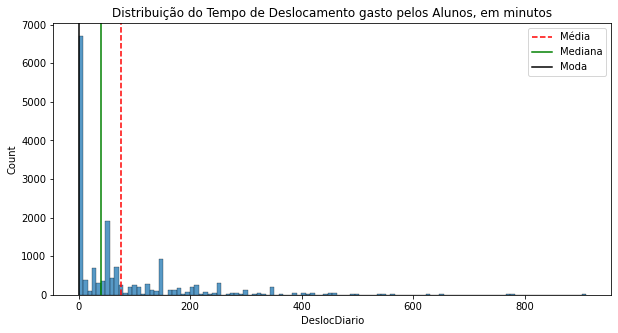

In [84]:
mean =dados['DeslocDiario'].mean()
median =dados['DeslocDiario'].median()
mode =dados['DeslocDiario'].mode()

ax = sns.histplot(data = dados, x = dados['DeslocDiario'], palette='pastel')
ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='g', linestyle='-')
ax.axvline(mode[0], color='black', linestyle='-')
plt.legend({'Média':mean,'Mediana':median,'Moda':mode})
ax.set_title('Distribuição do Tempo de Deslocamento gasto pelos Alunos, em minutos')
ax.figure.set_size_inches(10, 5)

Entretanto, a Moda indica que o valor mais utilizado é 0. Como é extremamente incomum a maioria das pessoas gastarem 0 minutos de deslocamento diário, iremos retirar os zeros para refazer a mesma análise.

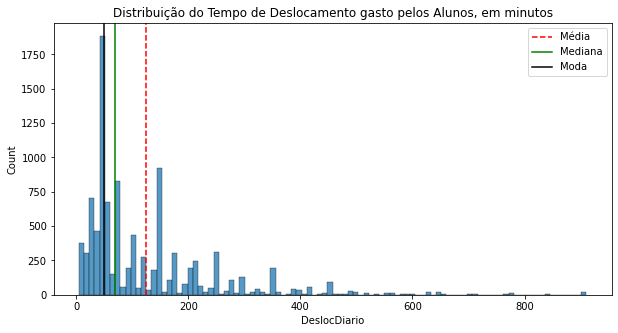

In [85]:
dados_deslocamento = dados[dados['DeslocDiario'] != 0]

mean =dados_deslocamento['DeslocDiario'].mean()
median =dados_deslocamento['DeslocDiario'].median()
mode =dados_deslocamento['DeslocDiario'].mode()

ax = sns.histplot(data = dados_deslocamento, x = dados_deslocamento['DeslocDiario'], palette='pastel')
ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='g', linestyle='-')
ax.axvline(mode[0], color='black', linestyle='-')
plt.legend({'Média':mean,'Mediana':median,'Moda':mode})
ax.set_title('Distribuição do Tempo de Deslocamento gasto pelos Alunos, em minutos')
ax.figure.set_size_inches(10, 5)

In [88]:
print("Média de Deslocamento: ",mean)
print("Moda de Deslocamento: ",mode)

Média de Deslocamento:  124.59165335463258
Moda de Deslocamento:  0    50.0
dtype: float64


In [87]:
#Boxplot com Pyplot Express
fig = px.box(dados_deslocamento, y="DeslocDiario", points="all", title = "Distribuição dos Deslocamentos Diários")
fig.show()

Neste novo cenário, vemos que a média de deslocamento diário é de 124 minutos (2 horas) e a moda é de 50 minutos.

Deste modo, podemos agora dividir os tempos de deslocamento entre escolas públicas e privadas para avaliar a hipótese sugerida.

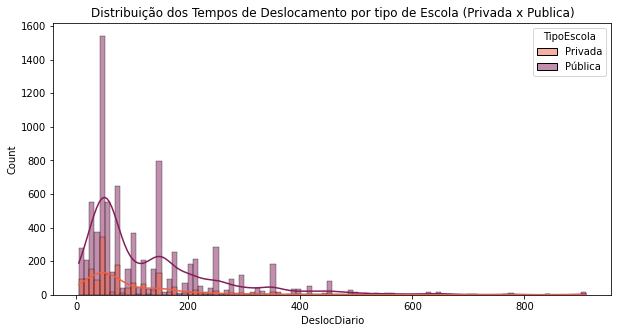

In [101]:
ax = sns.histplot(data = dados_deslocamento, x = 'DeslocDiario', kde=True, hue = 'TipoEscola', palette='rocket_r')
ax.set_title('Distribuição dos Tempos de Deslocamento por tipo de Escola (Privada x Publica)')
ax.figure.set_size_inches(10, 5)

**Conclusão:** Como podemos ver o tempo de deslocamento dos alunos de escola pública são consideravelmente superiores aos dos alunos de escola privada, o que pode comprometer diversos outros aspectos no processo de aprendizagem.

###### **6) Uma pesquisa recente noticiada na revista Galileu aponta que as meninas de 19 anos têm em média 23,30 de IMC. A amostra utilizada condiz com a pesquisa (mesmo contendo dados de 2015)?**

Para esta análise (que é de certa forma muito específica: sexo = feminino e idade = 19), iremos separar a base de dados com meninas com idade 18 e 19 anos para termos um volume maior de dados. 


In [102]:
dados_meninas_18mais = dados.loc[(dados["Idade"] >= 18) & (dados["Sexo"]=="Feminino")]
dados_meninas_18mais_privada = dados.loc[(dados["Idade"]>= 18) & (dados["Sexo"]=="Feminino") & (dados["TipoEscola"]=="Privada")]
dados_meninas_18mais_publica = dados.loc[(dados["Idade"]>= 18) & (dados["Sexo"]=="Feminino") & (dados["TipoEscola"]=="Pública")]
dados_meninas_18mais.describe()

,Idade,DeslocDiario,Altura,Peso,IMC
count,392.000000,391.000000,392.000000,392.000000,392.000000
mean,18.436224,91.905371,1.592194,58.921173,23.222959
std,0.496550,129.659371,0.066327,13.182701,4.891700
min,18.000000,0.000000,1.440000,36.600000,14.610000
25%,18.000000,0.000000,1.550000,50.175000,19.702500
50%,18.000000,50.000000,1.590000,56.400000,22.270000
75%,19.000000,150.000000,1.640000,65.425000,25.855000
max,19.000000,910.000000,1.850000,122.000000,44.270000


Após separar as bases de dados, iremos utilizar o [T-Test](https://blog.minitab.com/pt/como-entender-os-testes-t-valores-t-e-distribuicoes-t) para obter o [p-valor](https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-correctly-interpret-p-values) deste teste estatístico para obter a significância estatística da nossa hipótese apresentada na amostra de dados em estudo. Desta forma, poderemos rejeitar ou aceitar a hipótese de meninas de 19 anos terem IMC médio de 23.3. Ou seja, quão mais próximo for o p-valor de 0, mais improvável é a hipótese ser verdadeira.

**Extra:** Entendimento de [Testes de Hipóteses](https://medium.com/data-hackers/o-que-realmente-um-teste-de-hip%C3%B3teses-quer-nos-dizer-b82801b03529).

In [109]:
stat2, p = sct.ttest_1samp(dados_meninas_18mais['IMC'], popmean=23.30)
print('Teste de Escola Pública')
print('Estatística de teste: {}'.format(stat2.round(2)))
print('p-valor: {}'.format(p.round(2)))

Teste de Escola Pública
Estatística de teste: -0.31
p-valor: 0.76


Como vemos acima, o p-valor é de 0.76. A depender do grau de confiabilidade de quem interpreta, este valor pode ser aceito ou não. Ao meu entendimento da base de dados, seria aceitável uma probabilidade de 76% de ser verdade.

In [103]:
dados_meninas_18mais_privada.describe()

,Idade,DeslocDiario,Altura,Peso,IMC
count,19.000000,19.000000,19.000000,19.00000,19.000000
mean,18.157895,11.052632,1.618421,60.90000,23.254737
std,0.374634,20.855252,0.075001,13.48184,5.160787
min,18.000000,0.000000,1.500000,44.40000,18.030000
25%,18.000000,0.000000,1.580000,48.35000,19.385000
50%,18.000000,0.000000,1.600000,56.20000,23.030000
75%,18.000000,12.500000,1.635000,69.60000,24.170000
max,19.000000,70.000000,1.840000,86.30000,37.200000


In [107]:
stat, p = sct.ttest_1samp(dados_meninas_18mais_privada['IMC'], popmean=23.30)
print('Teste de Escola Privada')
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(2)))

Teste de Escola Privada
Estatística de teste: -0.04
p-valor: 0.97


In [104]:
dados_meninas_18mais_publica.describe()

,Idade,DeslocDiario,Altura,Peso,IMC
count,373.000000,372.000000,373.000000,373.000000,373.000000
mean,18.450402,96.034946,1.590858,58.820375,23.221340
std,0.498202,131.527687,0.065688,13.177809,4.884886
min,18.000000,0.000000,1.440000,36.600000,14.610000
25%,18.000000,0.000000,1.550000,50.300000,19.740000
50%,18.000000,50.000000,1.580000,56.400000,22.270000
75%,19.000000,150.000000,1.640000,65.400000,25.870000
max,19.000000,910.000000,1.850000,122.000000,44.270000


In [108]:
stat2, p = sct.ttest_1samp(dados_meninas_18mais_publica['IMC'], popmean=23.30)
print('Teste de Escola Pública')
print('Estatística de teste: {}'.format(stat2.round(2)))
print('p-valor: {}'.format(p.round(2)))

Teste de Escola Pública
Estatística de teste: -0.31
p-valor: 0.76


**Conclusão:** Quando dividimos em escolas Públicas e Privadas, podemos ver que a probabilidade da hipótese ser verdadeira para Escolas Privadas é de 97%, enquanto que nas escolas Públicas, é de 76% (igual ao do percentual da amostra completa). Logicamente o volume das amostras pode estar interferindo nos resultados, mas como prática de estudo, estarei validando.